In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/parkinsons disease data.csv')

In [3]:

df = df.drop(columns=['name'])
X = df.drop(columns=['status'])
y = df['status']

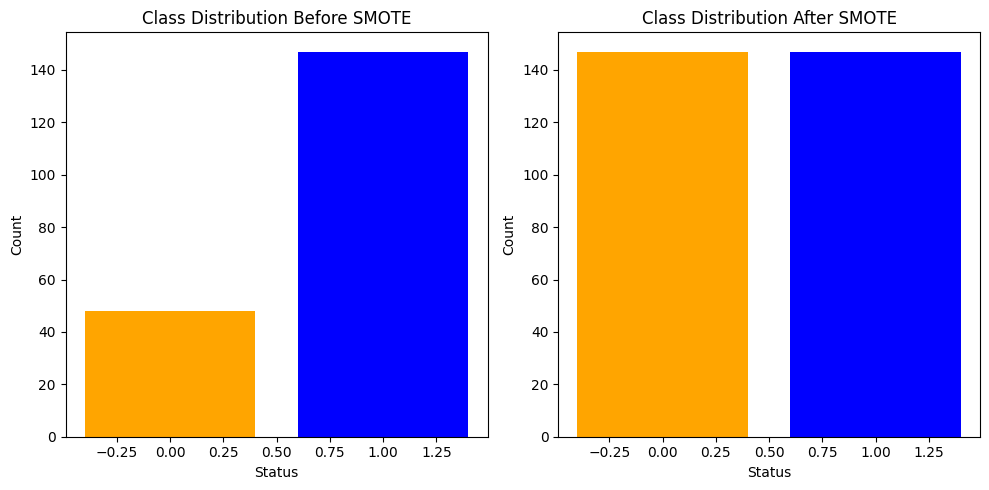

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(Counter(y).keys(), Counter(y).values(), color=['blue', 'orange'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Status")
plt.ylabel("Count")

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot class distribution after balancing
plt.subplot(1, 2, 2)
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color=['blue', 'orange'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Status")
plt.ylabel("Count")

# Show plots
plt.tight_layout()
plt.show()

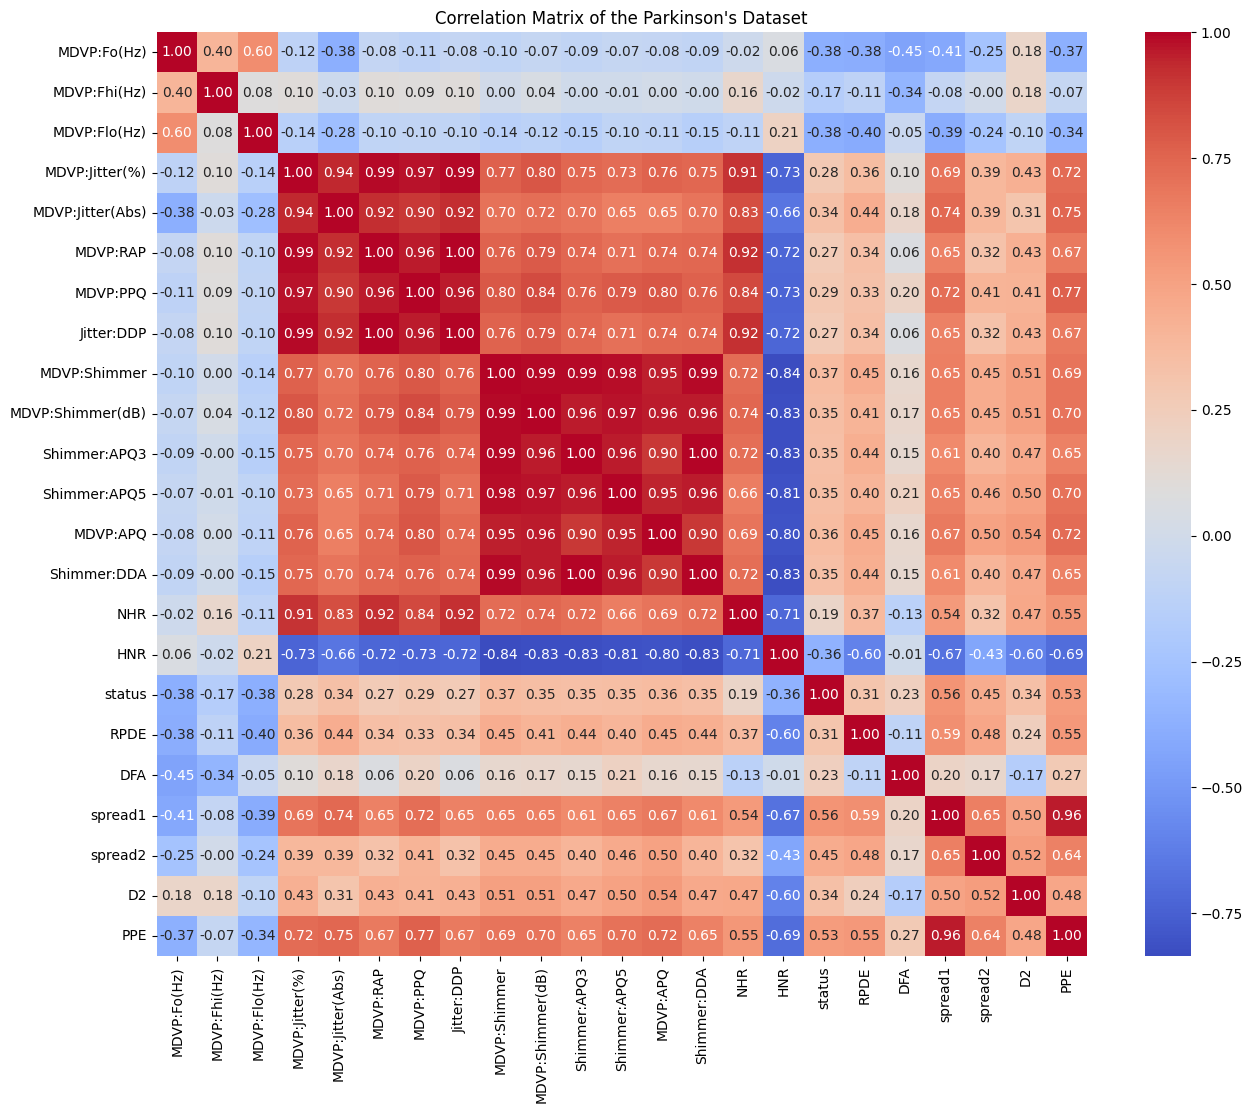

In [5]:
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of the Parkinson's Dataset")
plt.show()

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

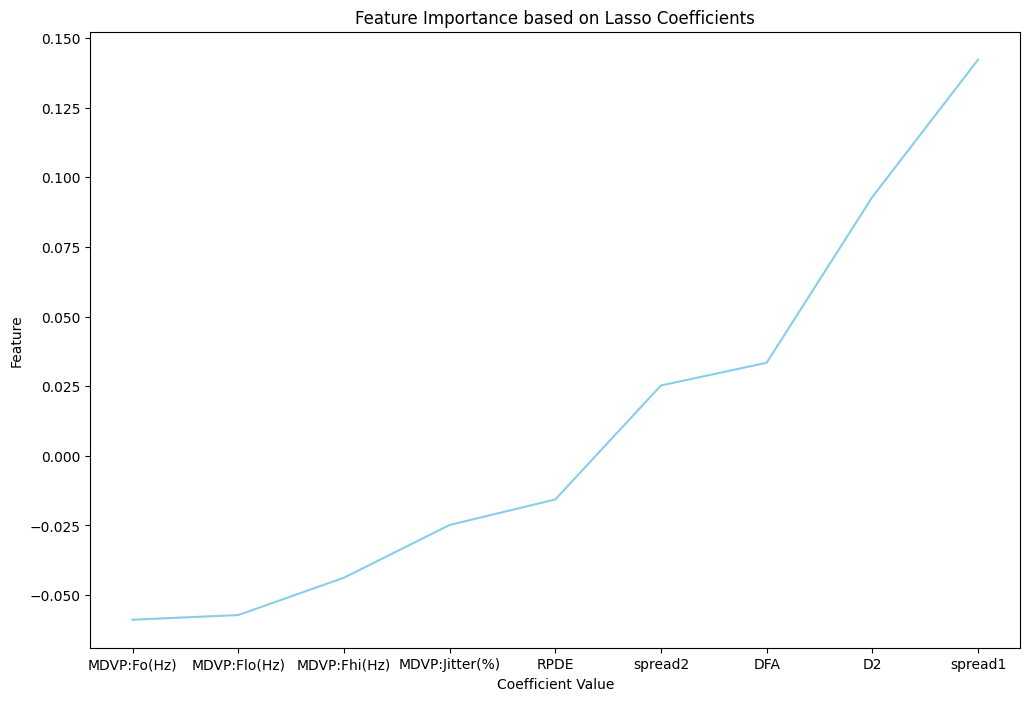

In [8]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Filter features with non-zero coefficients
important_features = lasso_coefficients[lasso_coefficients != 0]

# Plot the bar graph
plt.figure(figsize=(12, 8))
important_features.sort_values().plot(kind='line', color='skyblue')
plt.title("Feature Importance based on Lasso Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

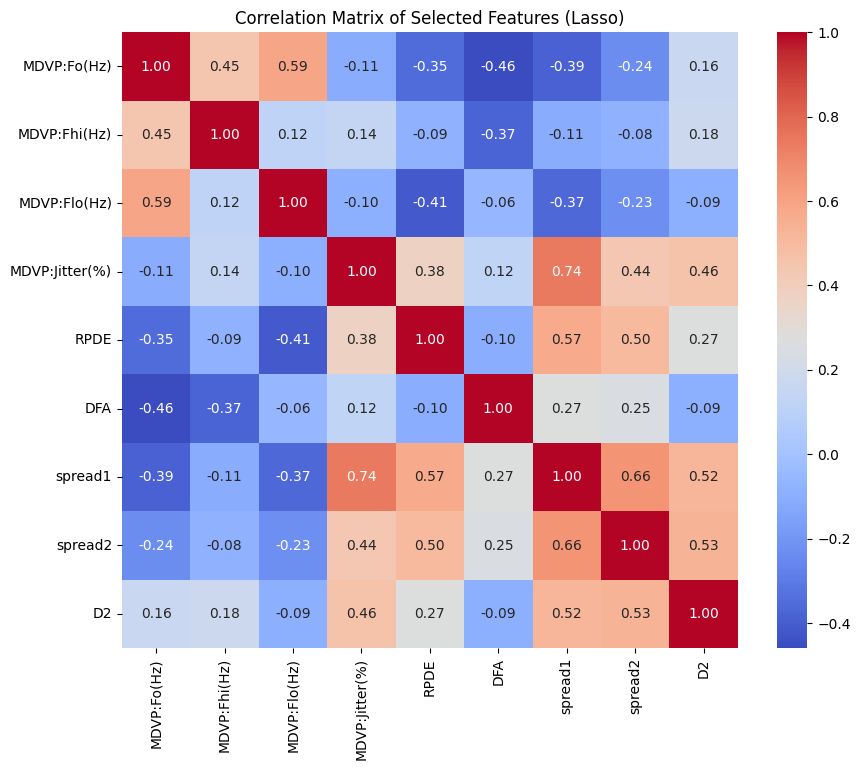

In [9]:
# Select features based on non-zero Lasso coefficients
selected_features = X.columns[(lasso.coef_ != 0)]
X_selected = pd.DataFrame(X_train, columns=X.columns)[selected_features]

# Calculate the correlation matrix
correlation_matrix = X_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Correlation Matrix of Selected Features (Lasso)")
plt.show()

                 Model  Accuracy  F1 Score  Precision   Recall       MAE  \
2        Random Forest  0.948718  0.969697   0.941176  1.00000  0.051282   
1        Decision Tree  0.923077  0.953846   0.939394  0.96875  0.076923   
0  Logistic Regression  0.897436  0.941176   0.888889  1.00000  0.102564   
3                  SVM  0.846154  0.911765   0.861111  0.96875  0.153846   
4  K-Nearest Neighbors  0.820513  0.892308   0.878788  0.90625  0.179487   
5          Naive Bayes  0.692308  0.785714   0.916667  0.68750  0.307692   

        MSE  R-Squared    Confusion Matrix  
2  0.051282   0.651786   [[5, 2], [0, 32]]  
1  0.076923   0.477679   [[5, 2], [1, 31]]  
0  0.102564   0.303571   [[3, 4], [0, 32]]  
3  0.153846  -0.044643   [[2, 5], [1, 31]]  
4  0.179487  -0.218750   [[3, 4], [3, 29]]  
5  0.307692  -1.089286  [[5, 2], [10, 22]]  


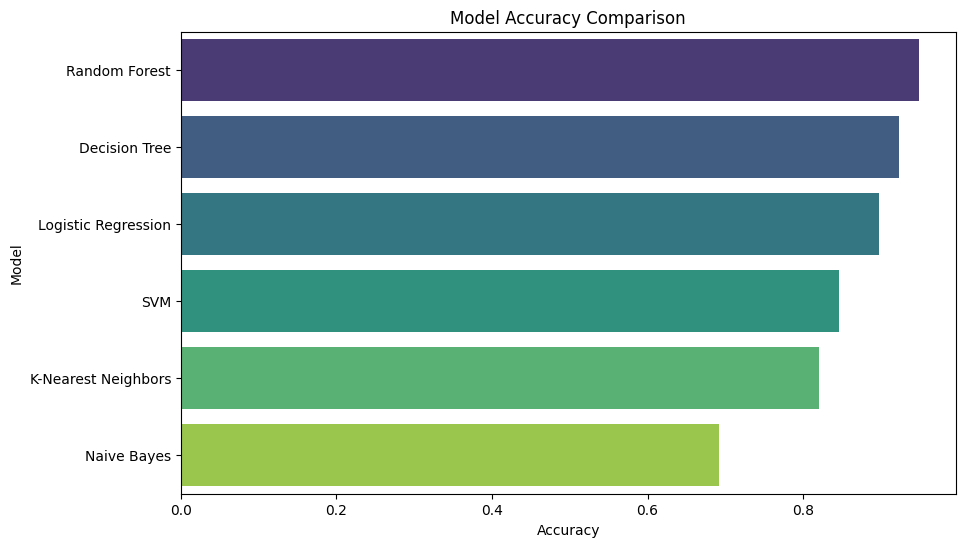

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             mean_absolute_error, mean_squared_error, r2_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'MAE': [],
    'MSE': [],
    'R-Squared': [],
    'Confusion Matrix': []
}

# Train and evaluate each model
for name, clf in models.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['R-Squared'].append(r2)
    results['Confusion Matrix'].append(cm)

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Print the results DataFrame
print(results_df)

# Plotting model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

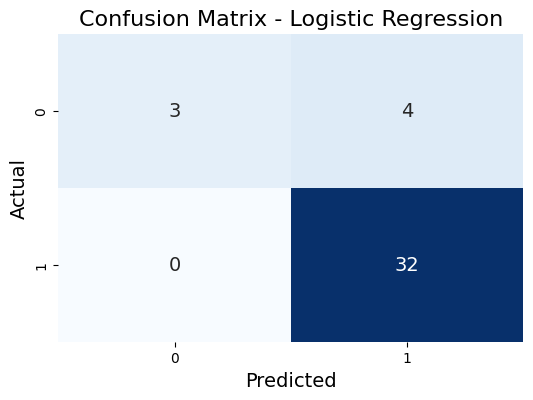

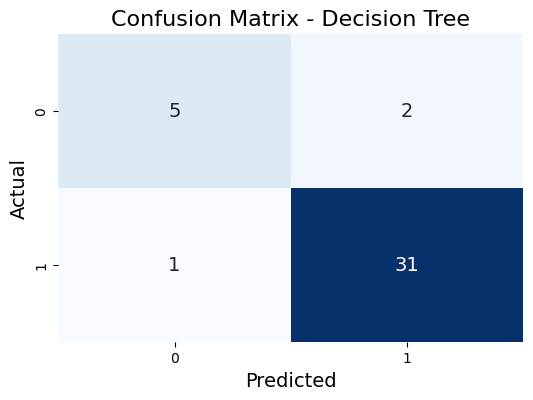

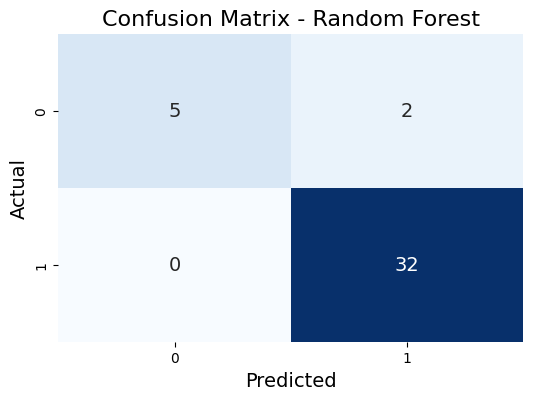

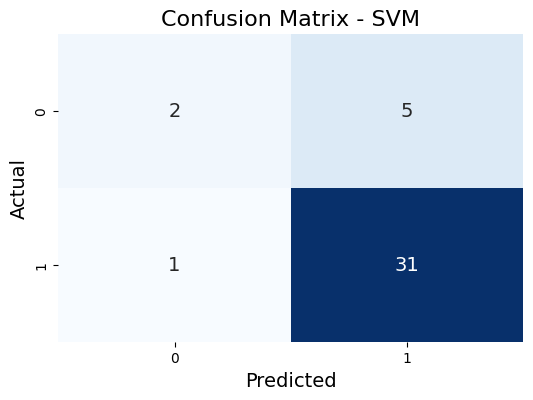

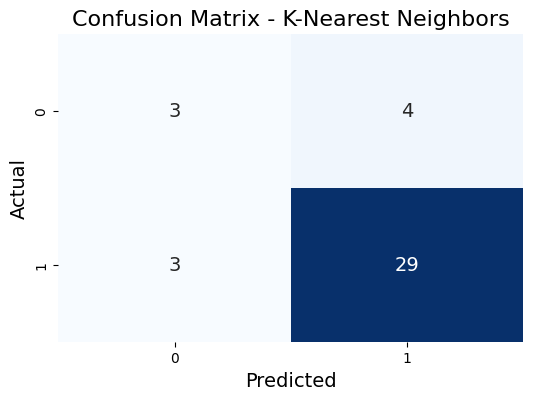

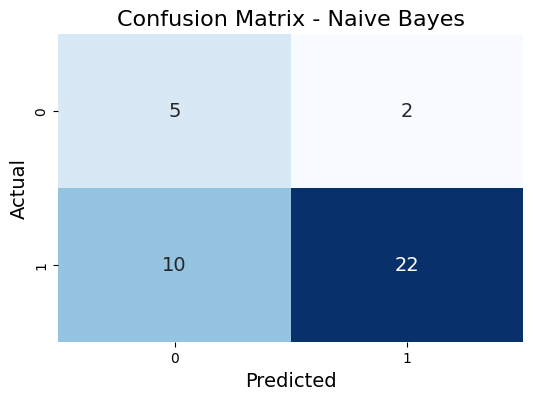

In [12]:
# Import required libraries for machine learning models and plotting
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
    plt.title(f"Confusion Matrix - {model_name}", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.show()


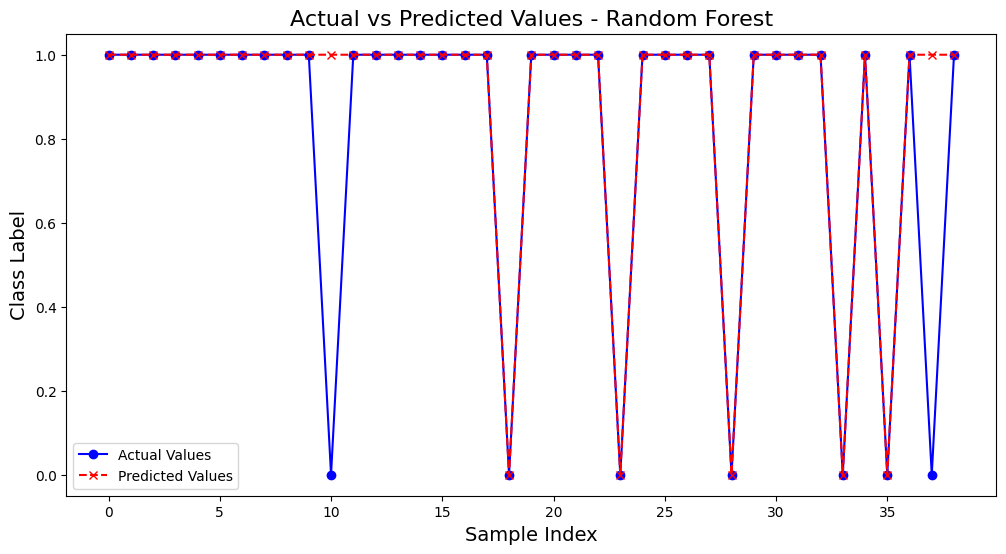

In [13]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='blue', linestyle='-', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')

# Customizing the plot
plt.title("Actual vs Predicted Values - Random Forest", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Class Label", fontsize=14)
plt.legend()
plt.show()
